Installing necessary libraries

**Tweepy** - for accessing Twitter API

**VaderSentiment** - part of NLTK is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

**Pandas** - for data manipulation and analysis

In [0]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

KeyboardInterrupt: ignored

Importing installed libraries


In [1]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Connecting to Twitter developer account

In [0]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

Searching Twitter for a **word** and getting the **latest 200 tweets**.

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('Virat Kohli', count=200)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)

,Tweets
0,Most 50+ Score In T20I:\n\nRohit Sharma: 20*\n...
1,RT @GuideforAll: #RohitSharma 🇮🇳 now become th...
2,RT @mohanstatsman: Most international sixes si...
3,RT @mohanstatsman: Most international sixes si...
4,RT @mohanstatsman: Most international sixes si...
5,RT @mohanstatsman: Most international sixes si...
6,RT @mohanstatsman: Most international sixes si...
7,RT @Ro_HitManZone: Rohit Sharma has completed ...
8,RT @RoUniverse45: Rohit Sharma has completed 5...
9,RT @mohanstatsman: Most international sixes si...


2019-02-08 10:40:38


Downloading vader lexicon

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### Running Sentiment Analysis on those tweets and finding out the number of positive negative and neutral tweets.

In [5]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

# display(data.head(100))
# print(se.values[0])

negative = []
for ne in se.values:
  if ne['neg'] > 0:
    negative.append(ne['neg'])
    
print(len(negative))

positive = []
for ps in se.values:
  if ps['pos'] > 0:
    positive.append(ps['pos'])

print(len(positive))
neutral = []
for nt in se.values:
  if nt['neu'] > 0:
    neutral.append(nt['neu'])

print(len(neutral))

25
38
100


Importing library for plotting graph.

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

###Calculating percentage of tweets and showing them in a pie chart.###

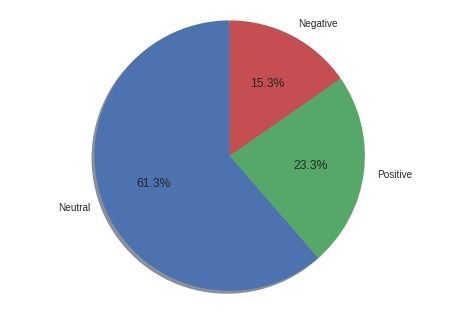

In [7]:
neg_percent = (len(negative)/200)*100
pos_percent = (len(positive)/200)*100
neu_percent = (len(neutral)/200)*100

sizes = [neu_percent, pos_percent, neg_percent]
labels = ['Neutral', 'Positive', 'Negative']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()